## 任务二：图的邻接表存储结构的实现（难度：★★★★）（单链表实现思路）

　　这里简单说一下，上面那个任务二参考答案是后来看《数据结构》一书相应章节的内容，然后才想出来的解题思路，而这个是在此之前自己想到的一个思路，**一个是按照书上给的思路设计的代码**，**一个是依据单链表设计的代码**，具体正确与否还有待商定，这里就先一起公布了，后续有问题的话我会继续修改。当然，这些代码都仅代表个人想法哈，毕竟个人水平有限，放在这里仅供参考，如果有更好的方式，欢迎评论区分享哈！！

### 1. 定义结点类

In [2]:
# 结点类:包含三部分内容：数据，权重，以及下一指针指向
class Node():
    def __init__(self, data):
        self.data = data
        self.weight = 0
        self.next = None

### 2. 定义单链表类

In [3]:
# 单链表类：每一个顶点的邻接表都用一条单链表表示
class Linklist():
    # 链表初始化
    def __init__(self, node):
        self.head = node # 定义头指针
    
    # 返回头元素数据
    def GetHead(self):
        return self.head.data
        
    # 往邻接表里插入新的结点
    def AppendNode(self, node, weight):
        # 从头结点开始遍历
        nod = self.head
        while nod.next != None: # 当下一个结点的next为None时，停止遍历
            nod = nod.next
        node.weight = weight
        nod.next = node

    # 遍历单链表
    def Travel_linklist(self):
        data_list = [] # 创建个空数组，存储链表各结点元素值
        weight_list = []
        if self.head == None:
            return None
        nod = self.head # 从头节点开始遍历
        while nod != None: # 当结点为空时，到链表尾部，停止遍历
            data_list.append(nod.data)
            weight_list.append(nod.weight)
            nod = nod.next # 跳向下一个结点
        return data_list, weight_list

### 3. 定义图类

In [4]:
# 图类
class Graph():
    # 图的初始化
    def __init__(self):
        self.linklist = [] # 存储linklist对象的顶点列表
        self.nodelist = [] # 存储node对象顶点列表
     
    # 添加顶点
    def AddVertex(self, node):
        self.nodelist.append(node) # 将node结点保存到nodelist中，方便后续添加边操作
        linknode = Linklist(node) # 每个顶点的邻接表都可以看作是一条单链表
        self.linklist.append(linknode) # 将链表对象存入顶点列表中
    
    # 返回顶点列表
    def GetVertexList(self):
        name_list = []
        for vertex in self.linklist:
            name_list.append(vertex.GetHead()) # 返回每个顶点的所存数据
        return name_list
    
    # 添加边：往每个顶点链表添加
    def AddEdge(self, start, end, weight=0): # 默认权重为0
        if start not in self.nodelist or end not in self.nodelist: # 判断前顶点和尾顶点是否输入正确
            print("顶点输入错误！")
            return
        node = Node(end.data)# 新建一个Node对象，为了拷贝，防止插入时指针冲突
        node.weight = weight # 将边的权重设置为Node对象中的weight属性上
        for linkvex in self.linklist: # 遍历顶点链表列表
            if linkvex.head == start: # 找到前顶点的位置
                linkvex.AppendNode(node, weight) # 往邻接表中插入尾结点，即代表添加边完成
                return
    
    # 输出有向图中每个顶点的邻接表
    def PrintAdjacencyListDG(self): 
        adjs = [] # 定义一个列表存储顶点名称
        for linkvex in self.linklist: # 遍历顶点(链表对象)列表
            data_list, weight_list = linkvex.Travel_linklist() # 调用遍历每个单链表的遍历函数，返回数据集合和权重集合
            print("顶点：", end='')
            for data in data_list: # 依次遍历顶点名
                print(data, end=' --> ')
            print('null', end='')
            print() # 空行
            adjs.append(data_list) 
        return adjs # 返回存储顶点名称的列表
    
    # 输出有向网中每个顶点的邻接表（带权重）
    def PrintAdjacencyListUDG(self):
        adjs = [] # 定义一个列表存储顶点名称
        for linkvex in self.linklist:
            data_list, weight_list = linkvex.Travel_linklist()# 调用遍历每个单链表的遍历函数，返回数据集合和权重集合
            
            print("顶点：", end='')
            for i in range(len(data_list)):
                print(data_list[i], end=' -- ')
                if i != len(data_list)-1: # 由于前面为了方便，将权重放在结点中，但是由于权重是属于边上的，所以对于单链表而言，权重会比结点少一个
                    print(weight_list[i+1], end=' --')
            print('> null', end='')
            print() # 空行
            
            adjs.append(data_list)
        return adjs

### 4. 测试案例1 -- 有向图

![Image Name](https://cdn.kesci.com/upload/image/qwy5k8vyso.png?imageView2/0/w/400/h/400)

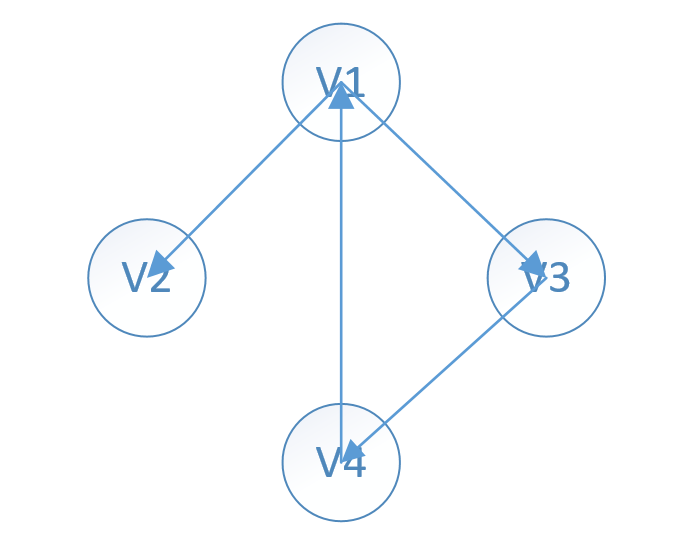

### 5. 创建一个图对象，并添加相应的顶点和弧边

In [5]:
# 创建一个图对象
graph = Graph()
# 创建4个顶点，邻接表中每个顶点都是一个单链表
V1 = Node('V1')
V2 = Node('V2')
V3 = Node('V3')
V4 = Node('V4')
vexs = [V1, V2, V3, V4]
for vex in vexs:
    graph.AddVertex(vex) # 将顶点添加到列表中

# 添加边
graph.AddEdge(V1, V2)
graph.AddEdge(V1, V3)
graph.AddEdge(V3, V4)
graph.AddEdge(V4, V1)

# 输出邻接表
adjacencyList = graph.PrintAdjacencyListDG()

顶点：V1 --> V2 --> V3 --> null
顶点：V2 --> null
顶点：V3 --> V4 --> null
顶点：V4 --> V1 --> null


In [6]:
adjacencyList

[['V1', 'V2', 'V3'], ['V2'], ['V3', 'V4'], ['V4', 'V1']]

### 6. 测试案例2 -- 有向网

![Image Name](https://cdn.kesci.com/upload/image/qx1ucdkbco.png?imageView2/0/w/640/h/480)

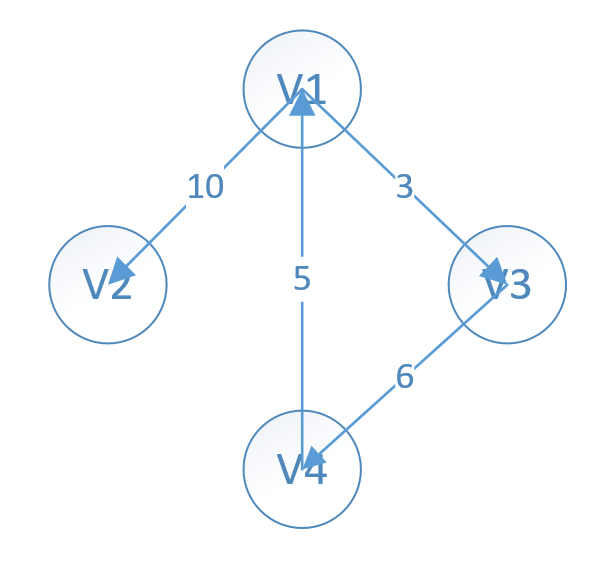

### 7. 创建一个图对象，并添加相应的顶点和弧边

In [7]:
# 创建一个图对象
graph_UDG = Graph()
# 创建4个顶点，邻接表中每个顶点都是一个单链表
V1 = Node('V1')
V2 = Node('V2')
V3 = Node('V3')
V4 = Node('V4')
vexs = [V1, V2, V3, V4]
for vex in vexs:
    graph_UDG.AddVertex(vex) # 将顶点添加到列表中

# 添加边
graph_UDG.AddEdge(V1, V2, 10)
graph_UDG.AddEdge(V1, V3, 3)
graph_UDG.AddEdge(V3, V4, 6)
graph_UDG.AddEdge(V4, V1, 5)

# 输出邻接表
adjacencyList = graph_UDG.PrintAdjacencyListUDG()

顶点：V1 -- 10 --V2 -- 3 --V3 -- > null
顶点：V2 -- > null
顶点：V3 -- 6 --V4 -- > null
顶点：V4 -- 5 --V1 -- > null
